DATA UNDERSTANDING STAGE1

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('C:/Users/Eng Salma Al-Yossef/Desktop/owid-covid-data.csv')

In [3]:
df.shape

(429435, 67)

In [4]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

MISSING VALUES PROCESSING

In [6]:
df.isnull().sum().sort_values(ascending = False).head(30)

weekly_icu_admissions_per_million          418442
weekly_icu_admissions                      418442
excess_mortality_cumulative_per_million    416024
excess_mortality                           416024
excess_mortality_cumulative                416024
excess_mortality_cumulative_absolute       416024
weekly_hosp_admissions_per_million         404938
weekly_hosp_admissions                     404938
icu_patients                               390319
icu_patients_per_million                   390319
hosp_patients_per_million                  388779
hosp_patients                              388779
total_boosters_per_hundred                 375835
total_boosters                             375835
new_vaccinations                           358464
new_tests                                  354032
new_tests_per_thousand                     354032
people_fully_vaccinated                    351374
people_fully_vaccinated_per_hundred        351374
total_tests                                350048


drop columns with huge amount of missing value

In [7]:
columns_to_drop = [
    "icu_patients", "icu_patients_per_million", "weekly_icu_admissions", 
    "weekly_icu_admissions_per_million", "weekly_hosp_admissions", 
    "weekly_hosp_admissions_per_million", "excess_mortality", 
    "excess_mortality_cumulative", "excess_mortality_cumulative_absolute", 
    "excess_mortality_cumulative_per_million",'hosp_patients_per_million','hosp_patients'
]
df = df.drop(columns=columns_to_drop)

the frame after drop columns

In [8]:
df.isnull().sum().sort_values(ascending = False).head(30)

total_boosters_per_hundred                    375835
total_boosters                                375835
new_vaccinations                              358464
new_tests                                     354032
new_tests_per_thousand                        354032
people_fully_vaccinated                       351374
people_fully_vaccinated_per_hundred           351374
total_tests                                   350048
total_tests_per_thousand                      350048
people_vaccinated_per_hundred                 348303
people_vaccinated                             348303
total_vaccinations_per_hundred                344018
total_vaccinations                            344018
tests_per_case                                335087
positive_rate                                 333508
new_tests_smoothed_per_thousand               325470
new_tests_smoothed                            325470
tests_units                                   322647
handwashing_facilities                        

القيم المكررة 

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(429435, 55)

In [11]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772


الفترة الزمنية المدروسة

In [12]:
print(df['date'].min())

2020-01-01


In [13]:
print(df['date'].max())

2024-08-14


 الامتداد الجغرافي_عدد البلدان قبل المعالجة

In [14]:
df['location'].nunique()

255

In [15]:
df['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor',
       'Ecuador', 'Egypt', 'El Salvador', 'England', 'Equatorial Guine

نلاحظ وجود تكتلات

In [16]:
to_remove = ["World", "Asia", "Europe", "Africa", "Oceania", "High income",
             "Upper middle income", "Lower middle income", "Low income",
             "European Union","European Union (27)","North America","South America"]
 
df = df[~df['location'].isin(to_remove)]


In [17]:
df = df[~df['location'].isin(to_remove)].copy()

In [18]:
df['location'].nunique()

247

top 10 countries by total deaths latest date

In [19]:
df_date_sorted = df.sort_values("date")

df_top_10 = df_date_sorted.drop_duplicates("location", keep="last").dropna().sort_values(ascending=False, by="total_deaths").head(10)



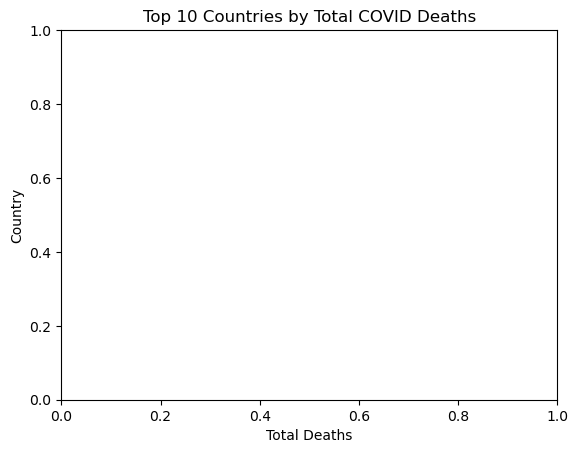

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(data=df_top_10, x='total_deaths', y='location')
plt.title('Top 10 Countries by Total COVID Deaths')
plt.xlabel('Total Deaths')
plt.ylabel('Country')
plt.show()

top 10 countries by  Deaths Rate latest date

In [21]:
df["death_rate"] = df["total_deaths"]/df["total_cases"]

In [ ]:
df_date_sorted = df.sort_values("date").drop_duplicates("location", keep="last")

df_top_10 = df_date_sorted[["location", "death_rate"]].dropna().sort_values(ascending=False, by="death_rate").head(10)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(data=df_top_10, x='death_rate', y='location')
plt.title('Top 10 Countries by  COVID Deaths Rates')
plt.xlabel('Total Deaths')
plt.ylabel('Country')
plt.show()

In [ ]:
df['death_rate'].head()